In [159]:
#Load all necessary libraries, load data into pandas dataframe, start looking at the data. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os


In [160]:
workdir = input('')

In [161]:
df = pd.read_csv('./data/crime.csv', parse_dates=True)

In [162]:
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


In [163]:
df.shape

(482127, 19)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482127 entries, 0 to 482126
Data columns (total 19 columns):
INCIDENT_ID               482127 non-null int64
OFFENSE_ID                482127 non-null int64
OFFENSE_CODE              482127 non-null int64
OFFENSE_CODE_EXTENSION    482127 non-null int64
OFFENSE_TYPE_ID           482127 non-null object
OFFENSE_CATEGORY_ID       482127 non-null object
FIRST_OCCURRENCE_DATE     482127 non-null object
LAST_OCCURRENCE_DATE      152304 non-null object
REPORTED_DATE             482127 non-null object
INCIDENT_ADDRESS          434767 non-null object
GEO_X                     478166 non-null float64
GEO_Y                     478166 non-null float64
GEO_LON                   478166 non-null float64
GEO_LAT                   478166 non-null float64
DISTRICT_ID               482127 non-null int64
PRECINCT_ID               482127 non-null int64
NEIGHBORHOOD_ID           482127 non-null object
IS_CRIME                  482127 non-null int64
IS_TRAFFIC

In [165]:
#Dropping All Null Values
df.isnull().sum(axis = 0)

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      329823
REPORTED_DATE                  0
INCIDENT_ADDRESS           47360
GEO_X                       3961
GEO_Y                       3961
GEO_LON                     3961
GEO_LAT                     3961
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

Many of the columns from info has the same number of non-null data which seems like the nulls values are left intentionally. Also sometimes the GEO locations (GEO_X, GEO_Y, GEO_LON, GEP_LAT) are filled with Null for privacy reason or the crime took place in a location that does not have a phyical address. The LAST_OCCURRENCE_DATE is sometimes left null because the crime occureed at a unknown time. It doesnt seem like there is any missing values in this dataset, which is a great start!


Next lets remove all the Traffic stop bc we do not want to looking speeding stops.

In [166]:
#Remove Traffic accidents 
df = df[df['IS_CRIME']==1]

In [167]:
df.head(n=2)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0


In [168]:
#creating a list of columns that are not needed for this analysis and can be dropped
droplist = ['OFFENSE_CODE_EXTENSION','INCIDENT_ADDRESS','LAST_OCCURRENCE_DATE','INCIDENT_ID','OFFENSE_CODE_EXTENSION','IS_TRAFFIC']
df = df.drop(droplist , axis=1)

In [169]:
#Add Hour,Day Of Week, Month, Year columns for later use
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])
df['REPORT_HOUR'] = pd.DatetimeIndex(df['REPORTED_DATE']).hour
df['REPORT_MONTH'] = pd.DatetimeIndex(df['REPORTED_DATE']).month
df['REPORT_YEAR'] = pd.DatetimeIndex(df['REPORTED_DATE']).year
df['REPORT_DAY'] = pd.DatetimeIndex(df['REPORTED_DATE']).dayofweek

In [170]:
#Sort totals in Offense types
group=display(df.groupby([df.OFFENSE_CODE,df.OFFENSE_TYPE_ID]).size())

OFFENSE_CODE  OFFENSE_TYPE_ID               
902           homicide-family                      22
910           homicide-negligent                    2
912           homicide-other                      230
1006          kidnap-adult-victim                 220
              kidnap-dv                           169
1099          false-imprisonment                  389
1102          sex-aslt-rape                      2269
              sex-aslt-rape-pot                   154
1109          sex-aslt-non-rape                   536
              sex-aslt-non-rape-pot               124
1113          sex-asslt-sodomy-man-strng-arm        1
1199          sex-aslt-w-object                    31
              sex-aslt-w-object-pot                 6
1202          robbery-business                   1471
1205          robbery-street                     3263
1208          robbery-residence                   396
1210          robbery-purse-snatch-w-force        338
1211          robbery-bank           

In [171]:
other = df[df['OFFENSE_CATEGORY_ID']=='all-other-crimes']
group=display(other.groupby([other.OFFENSE_CODE,other.OFFENSE_TYPE_ID]).size())

OFFENSE_CODE  OFFENSE_TYPE_ID               
1006          kidnap-adult-victim                 220
              kidnap-dv                           169
1099          false-imprisonment                  389
1310          aslt-agg-police-gun                   8
1311          agg-aslt-police-weapon              308
2199          extortion                            97
2699          pawn-broker-viol                     86
2803          stolen-property-buy-sell-rec        151
3612          sex-off-fail-to-register           1356
3613          sex-off-registration-viol           103
3911          gambling-device                       4
3991          gambling-gaming-operation            10
4801          police-resisting-arrest             759
4802          police-obstruct-investigation        28
4803          police-false-information           3700
              police-making-a-false-rpt            52
4812          failure-to-report-abuse               3
4813          police-disobey-lawful-o

In [172]:
other = df[df['OFFENSE_CATEGORY_ID']=='public-disorder']
group=display(other.groupby([other.OFFENSE_CODE,other.OFFENSE_TYPE_ID]).size())

OFFENSE_CODE  OFFENSE_TYPE_ID            
1316          harassment-stalking-dv           200
              threats-to-injure               5353
2999          criminal-mischief-graffiti      2995
              criminal-mischief-mtr-veh      14611
              criminal-mischief-other        12892
4002          prostitution-pimping              30
4004          prostitution-engaging-in         889
4099          prostitution-aiding                5
5302          riot-incite                        1
5303          riot                               1
5309          harassment                      1138
              harassment-dv                    484
              harassment-sexual-in-nature      324
5312          disturbing-the-peace            8444
5313          curfew                          1469
5314          loitering                          8
5399          public-peace-other              1531
dtype: int64

In [173]:
other = df[df['OFFENSE_CATEGORY_ID']=='sexual-assault']
group=display(other.groupby([other.OFFENSE_CODE,other.OFFENSE_TYPE_ID]).size())

OFFENSE_CODE  OFFENSE_TYPE_ID               
1102          sex-aslt-rape                     2269
              sex-aslt-rape-pot                  154
1109          sex-aslt-non-rape                  536
              sex-aslt-non-rape-pot              124
1113          sex-asslt-sodomy-man-strng-arm       1
1199          sex-aslt-w-object                   31
              sex-aslt-w-object-pot                6
3601          sex-aslt-fondle-adult-victim       841
dtype: int64

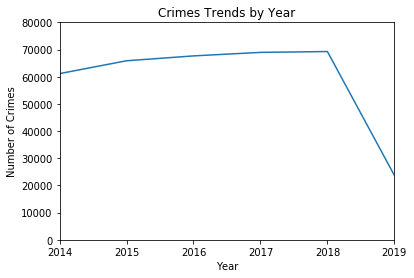

In [174]:

df['REPORT_YEAR'].groupby(df.REPORT_YEAR).agg('count').plot('line')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes Trends by Year')
plt.ylim(bottom=0,top=80000)
plt.show()

(0, 80000)

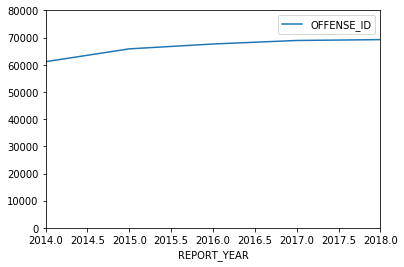

In [175]:
test2 =df[df.REPORT_YEAR != 2019].groupby(df.REPORT_YEAR).agg('count')
test2.plot(y='OFFENSE_ID')
plt.ylim(bottom=0,top=80000)



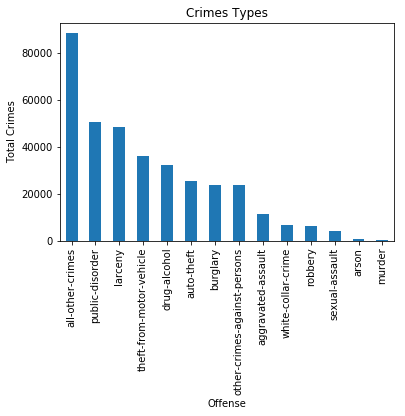

In [176]:
df['OFFENSE_CATEGORY_ID'].value_counts().plot(kind ='bar')
plt.title('Crimes Types')
plt.xlabel('Offense')
plt.ylabel('Total Crimes')
plt.show()


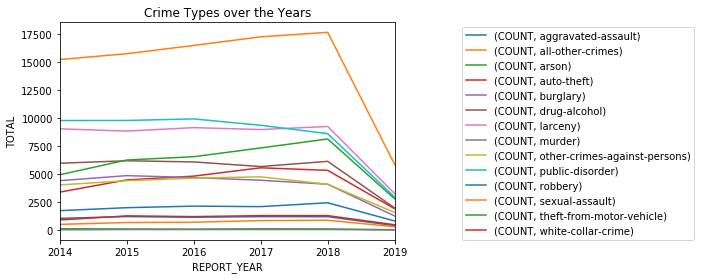

In [177]:
#Crime type by year
temp=df[['REPORT_YEAR','OFFENSE_CATEGORY_ID']].groupby([df.REPORT_YEAR, df.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORT_YEAR',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('Crime Types over the Years')
plt.show()

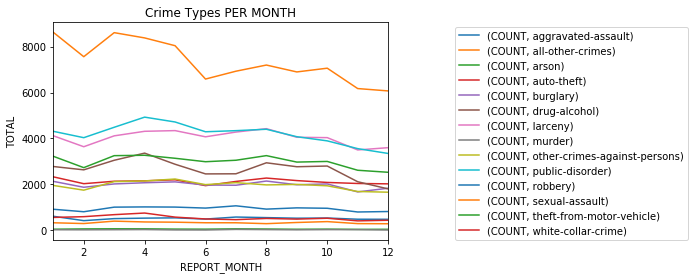

In [178]:
#Crime Type per Month
temp=df[['REPORT_MONTH','OFFENSE_CATEGORY_ID']].groupby([df.REPORT_MONTH, df.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORT_MONTH',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('Crime Types PER MONTH')
plt.show()

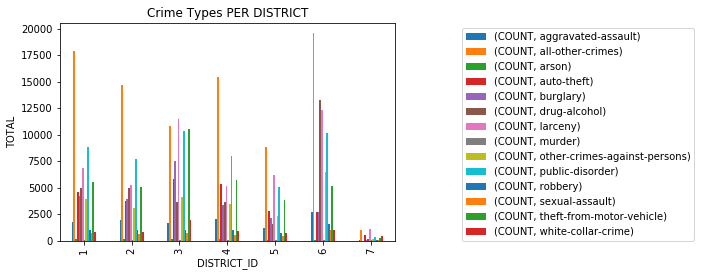

In [179]:
#Plotting 
temp=df[['DISTRICT_ID','OFFENSE_CATEGORY_ID']].groupby([df.DISTRICT_ID, df.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='DISTRICT_ID',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
temp.plot(kind='bar')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('Crime Types PER DISTRICT')
plt.show()

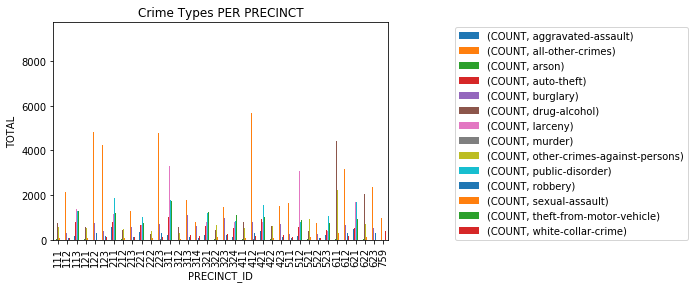

In [180]:
temp=df[['PRECINCT_ID','OFFENSE_CATEGORY_ID']].groupby([df.PRECINCT_ID, df.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='PRECINCT_ID',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
temp.plot(kind='bar')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('Crime Types PER PRECINCT')
plt.show()

## T-Test and P-Value

In [181]:
# df['REPORTED_DATE']=pd.to_datetime(df['REPORTED_DATE'])
# df['REPORT_MONTH']=pd.to_datetime(df['REPORT_MONTH'])
# df['REPORT_YEAR']=pd.to_datetime(df['REPORT_YEAR'])
# df['REPORT_DAY']=pd.to_datetime(df['REPORT_DAY'])
# df['REPORT_HOUR']=pd.to_datetime(df['REPORT_HOUR'])
#df.head()

In [182]:
weekday=df[(df['REPORT_DAY']==0)|(df['REPORT_DAY']==1)|(df['REPORT_DAY']==2)|(df['REPORT_DAY']==3)|(df['REPORT_DAY']==4)]
weekend=df[(df['REPORT_DAY']==5)|(df['REPORT_DAY']==6)]
weekday=weekday.REPORTED_DATE.dt.date.groupby(weekday.REPORTED_DATE.dt.date).agg('count')
weekend=weekend.REPORTED_DATE.dt.date.groupby(weekend.REPORTED_DATE.dt.date).agg('count')
stats.ttest_ind(weekday,weekend,equal_var=False)

Ttest_indResult(statistic=22.5695438130115, pvalue=1.907911389983567e-94)

The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable.

A large t-score tells you that the groups are different.

In [183]:
winter=df[(df['REPORT_MONTH']==12)|(df['REPORT_MONTH']==1)|(df['REPORT_MONTH']==2)]
spring=df[(df['REPORT_MONTH']==3)|(df['REPORT_MONTH']==4)|(df['REPORT_MONTH']==5)]
summer=df[(df['REPORT_MONTH']==6)|(df['REPORT_MONTH']==7)|(df['REPORT_MONTH']==8)]
fall=df[(df['REPORT_MONTH']==9)|(df['REPORT_MONTH']==10)|(df['REPORT_MONTH']==11)]
winter=winter.REPORTED_DATE.dt.date.groupby(winter.REPORTED_DATE.dt.date).agg('count')
spring=spring.REPORTED_DATE.dt.date.groupby(spring.REPORTED_DATE.dt.date).agg('count')
summer=summer.REPORTED_DATE.dt.date.groupby(summer.REPORTED_DATE.dt.date).agg('count')
fall=fall.REPORTED_DATE.dt.date.groupby(fall.REPORTED_DATE.dt.date).agg('count')
stats.ttest_ind(winter,summer,equal_var=False)

Ttest_indResult(statistic=-14.681396231633913, pvalue=4.113240773596648e-44)

Plot of crime per weekday vs weekend 

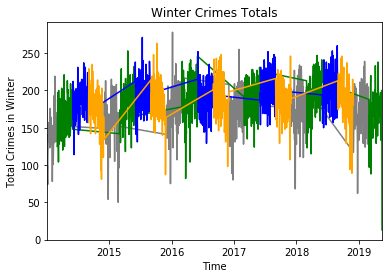

In [184]:
#Plotting Seasonal Crime Rates

winter.plot(kind ='line', color='grey')
spring.plot(kind = 'line', color ='green')
summer.plot(kind = 'line', color ='blue')
fall.plot(kind = 'line', color ='orange')
plt.title('Winter Crimes Totals')
plt.ylabel('Total Crimes in Winter')
plt.xlabel('Time')
plt.show()

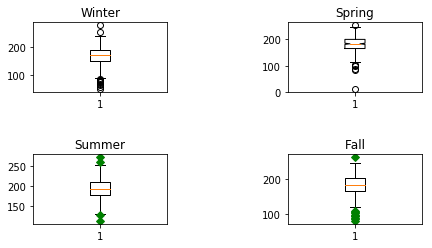

In [185]:
fig, axs = plt.subplots(2, 2)

# basic plot
axs[0, 0].boxplot(winter)
axs[0, 0].set_title('Winter')

# notched plot
axs[0, 1].boxplot(spring, 1)
axs[0, 1].set_title('Spring')

# change outlier point symbols
axs[1, 0].boxplot(summer, 0, 'gD')
axs[1, 0].set_title('Summer')

# don't show outlier points
axs[1, 1].boxplot(fall, 0, 'gD')
axs[1, 1].set_title("Fall")


fig.subplots_adjust(left=0.08, right=0.98, bottom=0.2, top=0.9,
                    hspace=0.9, wspace=0.9)

plt.show()

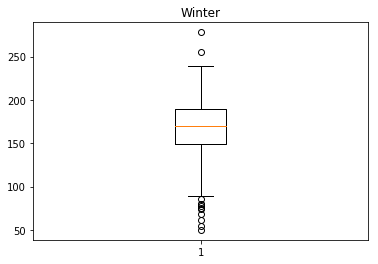

In [186]:
plt.boxplot(winter)
plt.title('Winter')
plt.show()

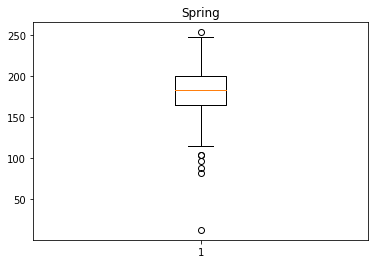

In [187]:
plt.boxplot(spring)
plt.title('Spring')
plt.show()

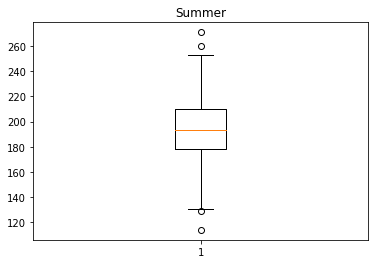

In [188]:
plt.boxplot(summer)
plt.title('Summer')
plt.show()

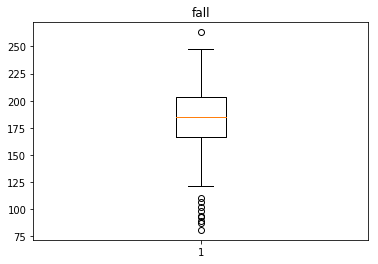

In [189]:
plt.boxplot(fall)
plt.title('fall')
plt.show()

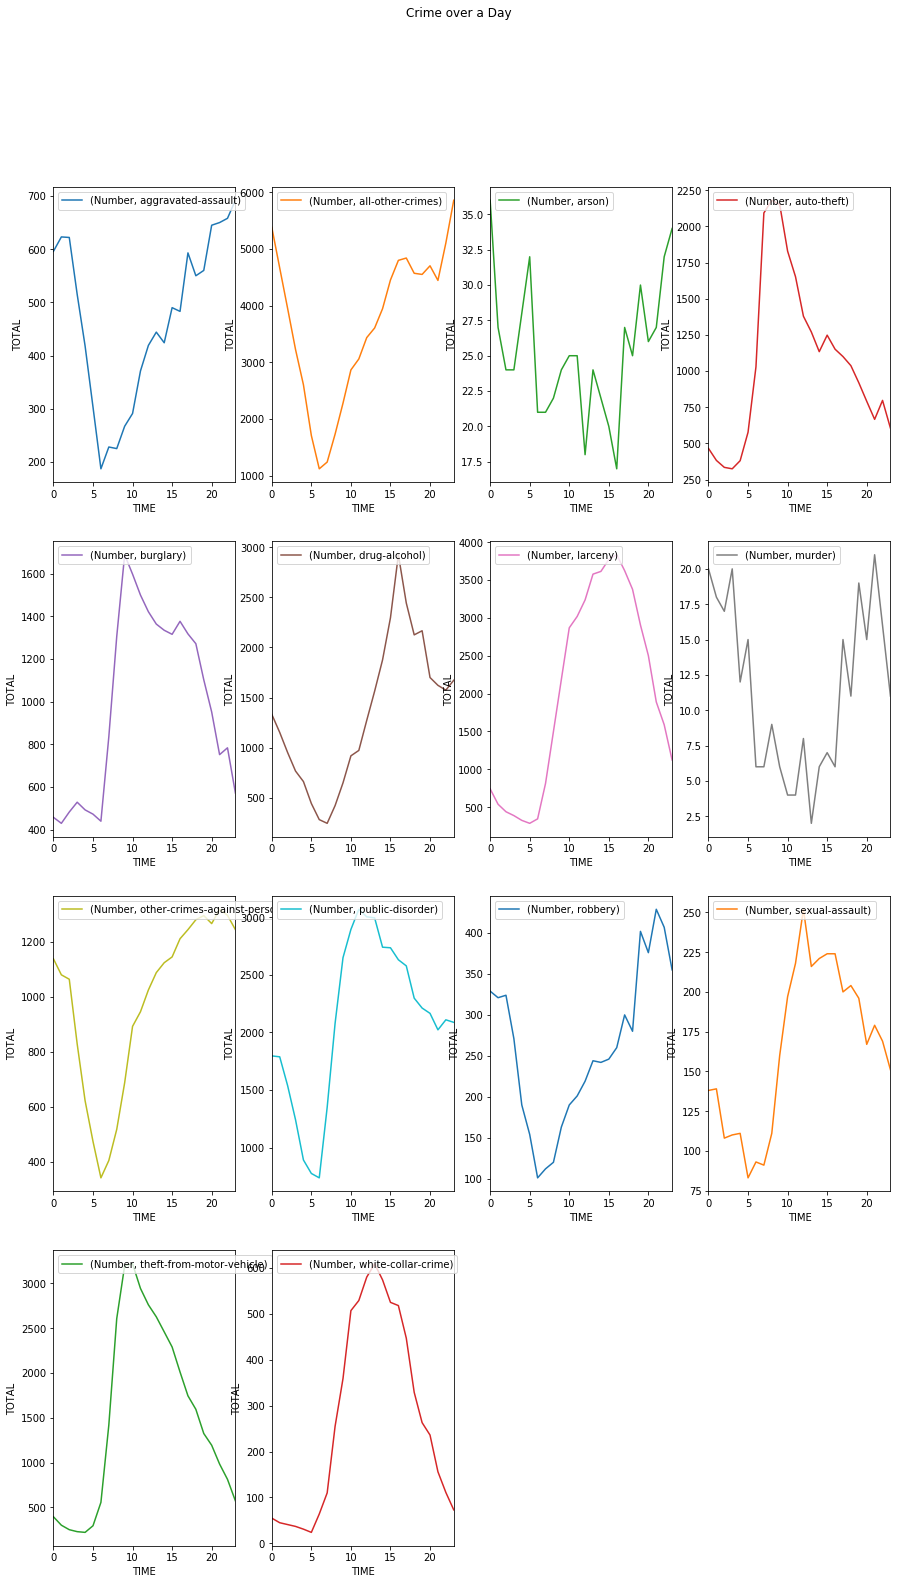

In [190]:
#Plots for each crime by the hour of over the 24 hours
t = df[['REPORT_HOUR','OFFENSE_CATEGORY_ID']].groupby([df.REPORT_HOUR, df.OFFENSE_CATEGORY_ID]).agg('count')
t = t.drop(labels = 'REPORT_HOUR', axis=1)
t.columns=['Number']
t.index=t.index.rename('TIME', level=0)
t = t.unstack(level=1)
fig = t.plot(kind='line', figsize=(15,25),subplots=True, layout=(-1,4), sharex=False, sharey=False)

for x in fig:
    for i in x:
        i.set_ylabel('TOTAL')
        i.legend(loc='upper left')
plt.suptitle('Crime over a Day')
plt.show()


At first glance it looks like the majority of crime is happening during the day (8AM-8PM) with the exception of murder and arson. Assault, robbery and other crimes agaisnt persons looks like they are more common after the sun goes down (10PM-2PM) while Auto-theft, theft-from-motor vehicle, and larceny have a high chance of occuring during business hours. In conclusion if you are in the dever area during the day do not leave valuables in your car and lock your doors while you are at work and be ready to defend yourself and your belongings at night.



In [191]:
dfYears = df[(df['REPORT_YEAR']==2014)|(df['REPORT_YEAR']==2015)|(df['REPORT_YEAR']==2016)|
             (df['REPORT_YEAR']==2017)|(df['REPORT_YEAR']==2018)]


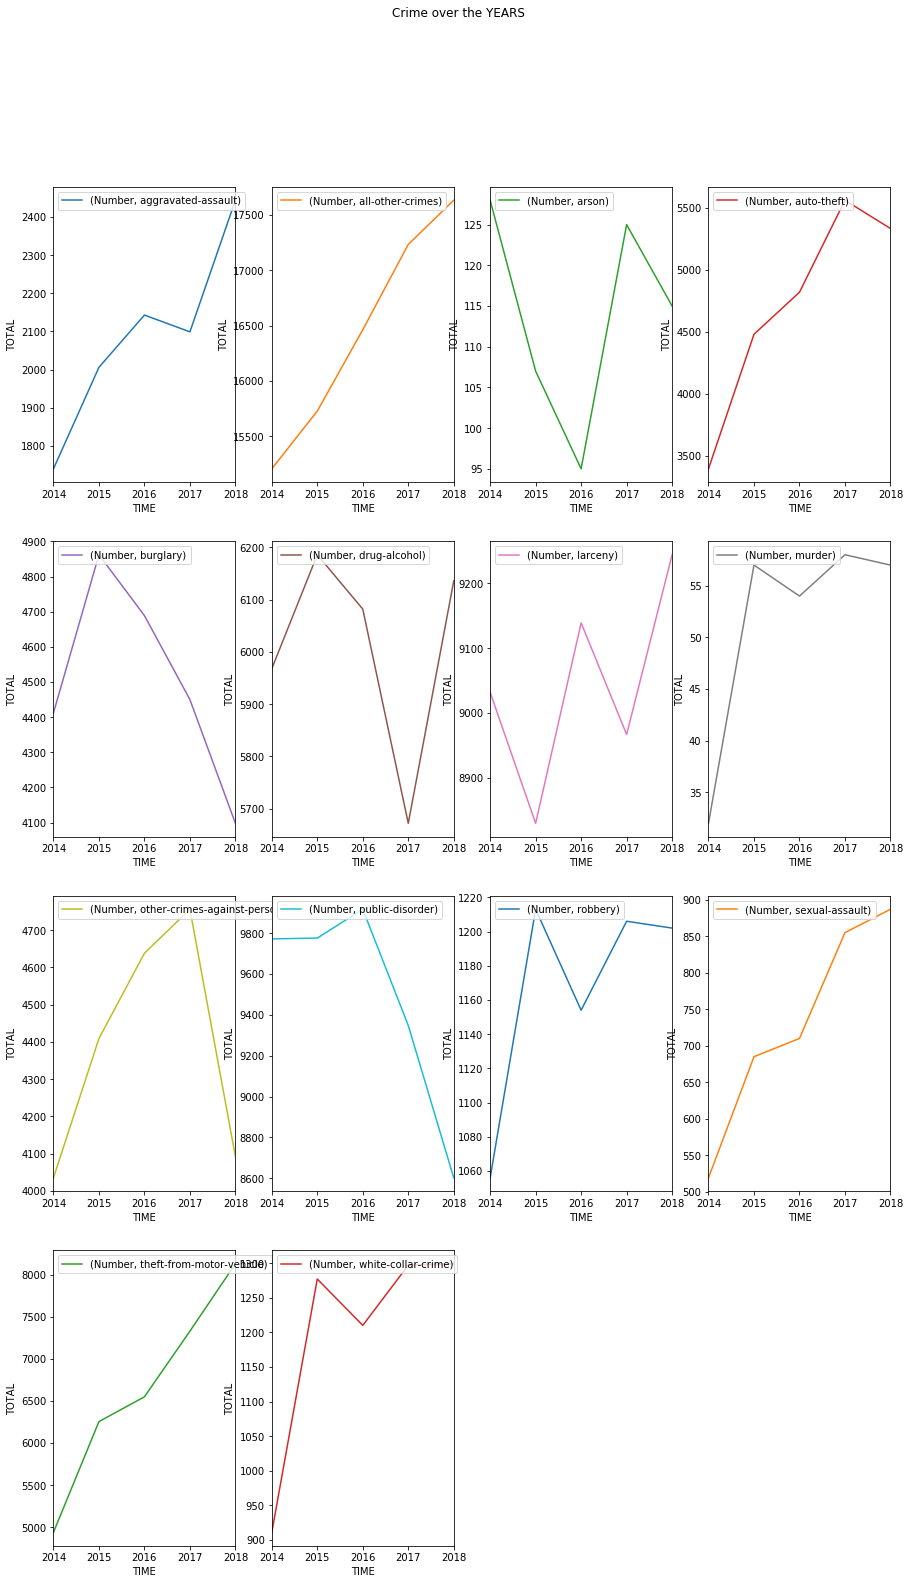

In [192]:
#Plots for each crime over all the Years in the data set
t = dfYears[['REPORT_YEAR','OFFENSE_CATEGORY_ID']].groupby([dfYears.REPORT_YEAR, df.OFFENSE_CATEGORY_ID]).agg('count')
t = t.drop(labels = 'REPORT_YEAR', axis=1)
t.columns=['Number']
t.index=t.index.rename('TIME', level=0)
t = t.unstack(level=1)
fig = t.plot(kind='line', figsize=(15,25),subplots=True, layout=(-1,4), sharex=False, sharey=False)

for x in fig:
    for i in x:
        i.set_ylabel('TOTAL')
        i.legend(loc='upper left')
plt.suptitle('Crime over the YEARS')
plt.show()

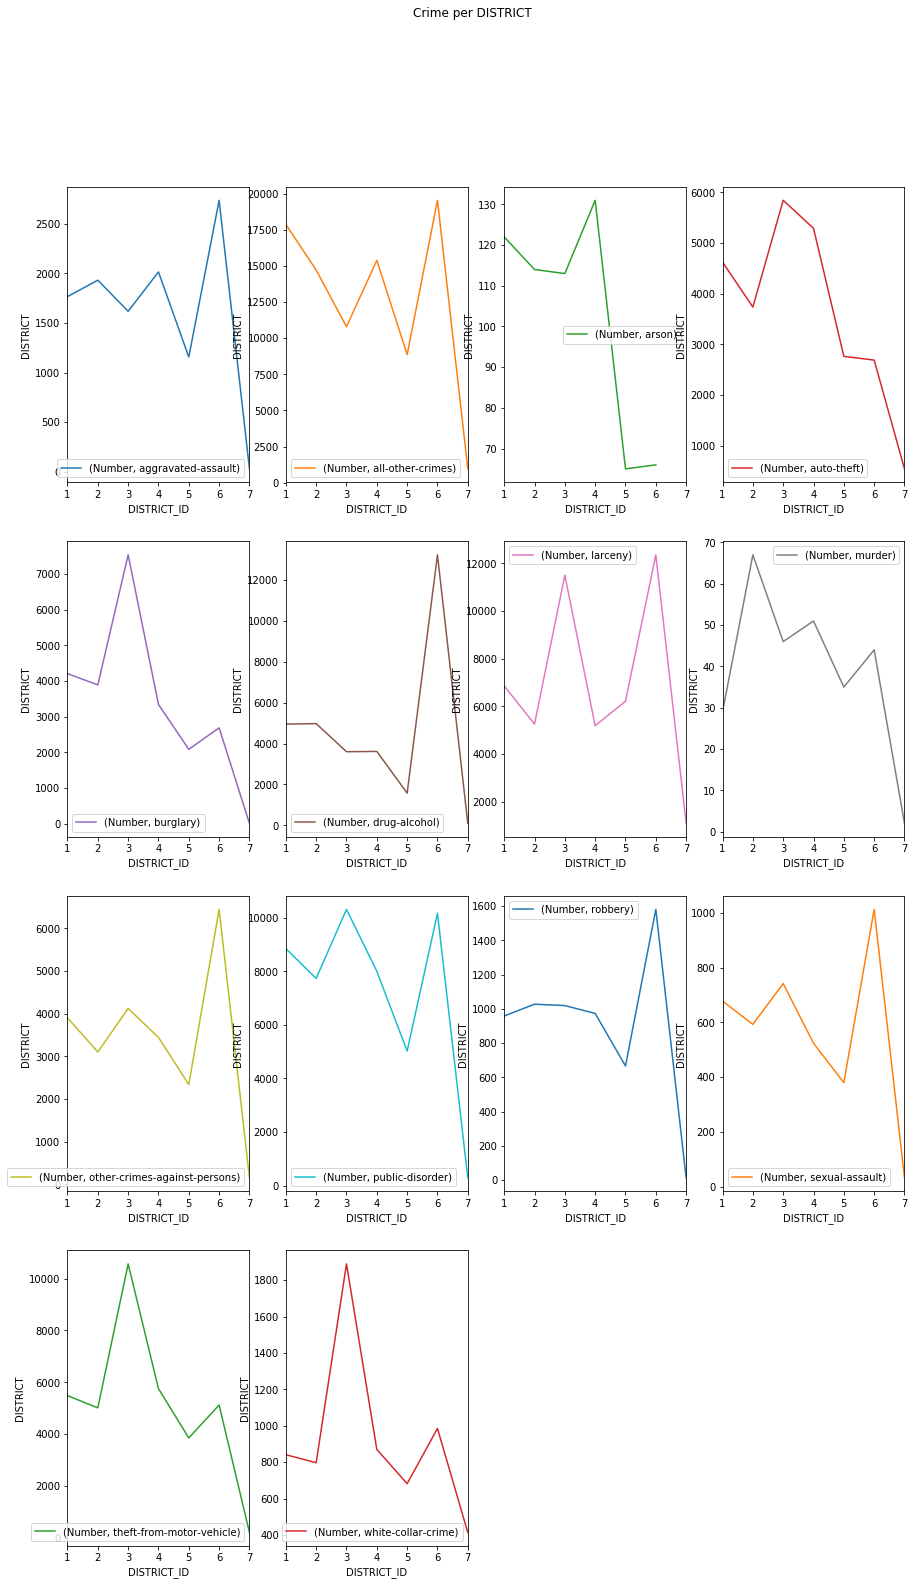

In [193]:
# Total Number of Crimes committed per District per year



t = df[['DISTRICT_ID','OFFENSE_CATEGORY_ID']].groupby([df.DISTRICT_ID, df.OFFENSE_CATEGORY_ID]).agg('count') 
t = t.drop(labels = 'DISTRICT_ID', axis=1)
t.columns=['Number']
t.index=t.index.rename('DISTRICT_ID', level=0)
t = t.unstack(level=1)
fig = t.plot(kind='line', figsize=(15,25),subplots=True, layout=(-1,4), sharex=False, sharey=False)

for x in fig:
    for i in x:
        i.set_ylabel('DISTRICT')
        i.legend(loc='best')
plt.suptitle('Crime per DISTRICT')
plt.show()

White collar crime, Thetf from motor vehicle, public disorder, burglary are more likely to happen in District 3 while District 6 are more likely for crimes agaisnt people - Sexualt Assault, Robbery, Other Crimes agaisnt Persons, larceny. And if you like living stay away from Districts 2,4,3.

In [194]:
#df.to_csv(workdir+'/data/CleanCrime.csv' , index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/data/CleanCrime.csv'